# An example using Feature weighted ECM clustering


In [1]:
## Importing
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.fwecm import fwecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score, silhouette_score


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


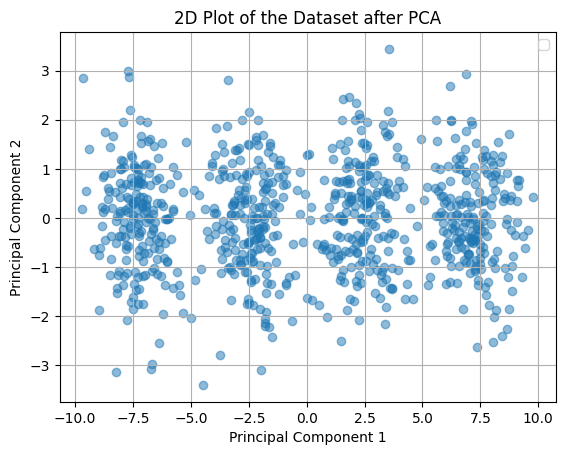

In [5]:
## Generating data set
# Number of points in each cluster
num_points = 200

# Number of dimensions for each point
num_dimensions = 6

# Mean and covariance matrices for each cluster
cluster_params = [
    {"mean": [1, 1, 1, 1, 1, 1], "covariance": np.eye(6), "label": 0},
    {"mean": [3, 3, 3, 3, 3, 3], "covariance": np.eye(6), "label": 1},
    {"mean": [5, 5, 5, 5, 5, 5], "covariance": np.eye(6), "label": 2},
    {"mean": [7, 7, 7, 7, 7, 7], "covariance": np.eye(6), "label": 3}
]

# Generate data for each cluster
# data = np.concatenate([np.random.multivariate_normal(params["mean"], params["covariance"], num_points) for params in cluster_params])
dataset = np.concatenate(
    [np.column_stack((np.random.multivariate_normal(params["mean"], params["covariance"], num_points),
                      np.full((num_points, 1), params["label"]))) for params in cluster_params])
df = pd.DataFrame(data=dataset[:, :-1])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(dataset[:, :-1])

# Plot the reduced dataset with different colors for each cluster
# plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

[1, 37.49547504689617]
[2, 36.211786984946514]
[3, 35.581461851768196]
[4, 35.160697106879304]
[5, 34.79081591512322]
[6, 34.419899458985235]
[7, 34.058346483528524]
[8, 33.73471435730348]
[9, 33.4715436645352]
[10, 33.26719578453821]
[11, 33.113510706218946]
[12, 33.00249764070213]
[13, 32.924854413213694]
[14, 32.87085567302956]
[15, 32.83243704214279]
[16, 32.80404743918814]
[17, 32.782209194120874]
[18, 32.764798985637256]
[19, 32.750505667281296]
[20, 32.7384946727491]
[21, 32.72821298091147]
[22, 32.719278038996244]
[23, 32.711414690885896]
[24, 32.70441888685469]
[25, 32.69813606321743]
[26, 32.69244752044534]
[27, 32.68726126074091]
[28, 32.6825054569344]
[29, 32.67812360530384]
[30, 32.67407084681895]
[31, 32.67031114962357]
[32, 32.66681514990636]
[33, 32.66355850573135]
[34, 32.660520653776274]
[35, 32.65768388269347]
[36, 32.65503265370204]
[37, 32.65255311166164]
[38, 32.65023273994164]
[39, 32.64806012093705]
[40, 32.64602477164007]
[41, 32.64411703043854]
[42, 32.6423279

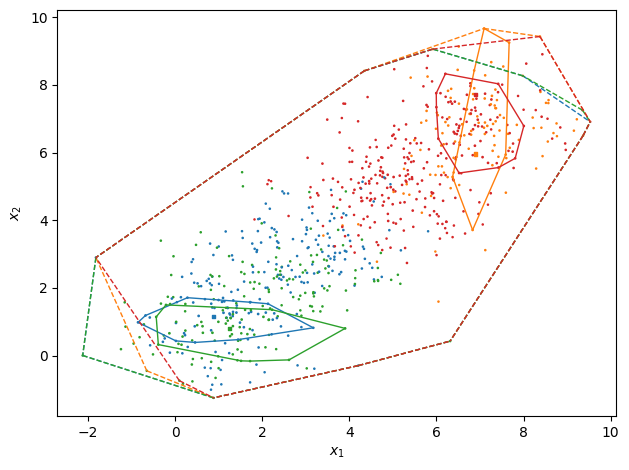

E:\STUDYing\Pre-Master\Study\Research Project\experiment\source-code\evclust\src\evclust\utils.py:875: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_coords = ind_coord.groupby('Cluster').mean()


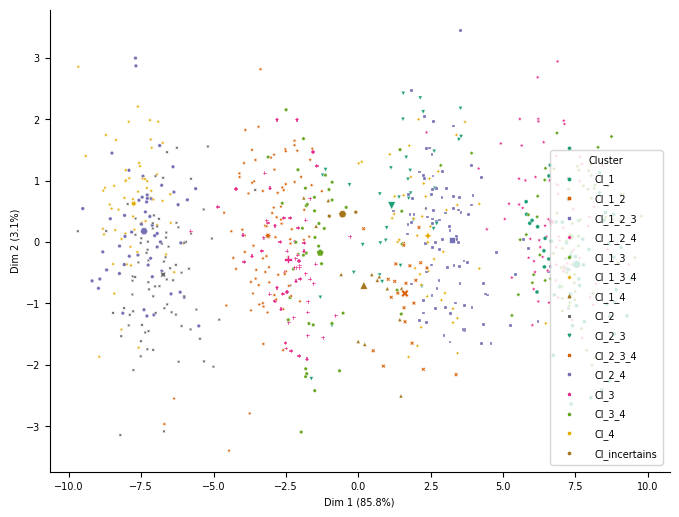

Adjusted Rand Index (ARI): 0.3455781180751988
Maximum Non-specificity value: 7.8808883197769735
Minimum Non-specificity value: 0.22974991653860838


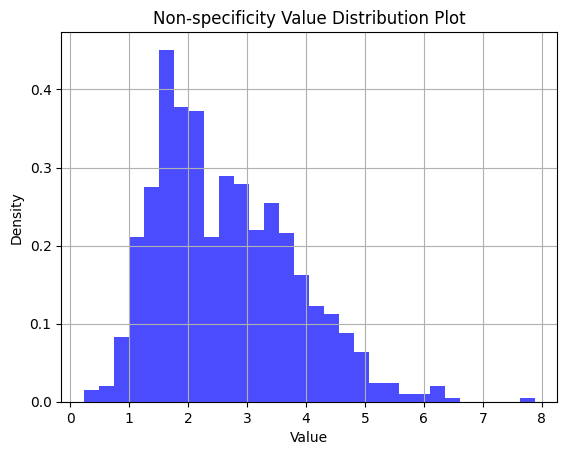

In [6]:
# Feature weighted ECM clustering
c=4
model = fwecm(x=df, c=c, beta=2, alpha=0.1, delta=9)

ev_plot(model, X=df)
ev_pcaplot(data=df, x=model, normalize=False)

# Compute the Adjusted Rand Index (ARI)
true_labels = dataset[:, -1].astype(int)
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity for each object 
m = model['mass']
F = model['F']
card = np.sum(F[1:F.shape[0], :], axis=1)

log_card = np.log2(card)
tmp = np.tile(log_card.transpose(), (m.shape[0], 1))
m_log_card = m[:, :-1] * tmp

mvide = m[:, -1][:, np.newaxis]
tmp2 = mvide * np.log2(c)
tmp3 = np.tile(tmp2, (1, m.shape[1] - 1))

non_specificity = m_log_card + tmp3
object_non_specificity = np.sum(non_specificity, axis=1)

print(f"Maximum Non-specificity value: {max(object_non_specificity)}")
print(f"Minimum Non-specificity value: {min(object_non_specificity)}")
# Plot the values
plt.clf()
plt.hist(object_non_specificity, bins=30, density=True, alpha=0.7, color='blue')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Non-specificity Value Distribution Plot')
plt.grid(True)
plt.show()

## Non-specificity equation
![test.png](assets/Non-specificity.png)